In [1]:
import numpy as np
import scipy.stats
import scipy.linalg
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
import sklearn as sk
import sklearn.gaussian_process as gp
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
class Transaction(object):
    
    N = 10
    n = 2900
    endtime = 0
    
    # Initialize. Complete manual initialization
    def __init__(self, time,tran_id, sender_id, receiver_id, amount, fee):
        self.starttime = time
        self.tran_id = tran_id
        self.sender_id = sender_id
        self.receiver_id = receiver_id
        self.amount = amount
        self.fee = fee
        self.total = fee+amount
        
    #Initialize. amount and fees determined using predetermined rates
    def __init__(self,time):
        self.starttime = time
        self.tran_id = 1
        self.sender_id = np.random.randint(0,self.n+1)
        self.receiver_id = np.random.randint(0,self.n+1)
        self.amount = np.random.randint(5,26)
        self.fee = (np.random.randint(1,3)/100)*self.amount
        self.total = self.amount+self.fee
    
    # Print a Transaction
    def __repr__(self):
        send = str(self.fee) 
        return send

In [3]:
hi = [1,2, 9, 17, 4,3,2]
newa =  np.argsort(hi)[-2:]
h = np.array(hi)[newa]
print(newa)

[2 3]


In [4]:
    zipped = zip(duration, amountt)
    saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['delay(hours)', 'fee amount'])
    sns.jointplot(x="fee amount", y="delay(hours)", data=saved, kind="kde")
    
     plt.figure()
    cumu = np.cumsum(Block.totalamount)
    ave = cumu/Block.time
    plt.step(Block.time, ave, where='post')
    plt.ylabel("Average Amount Transferred / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Amount of Money Transferred per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    newb = Block.NumberinBlock[1500:]
    newt= np.array(Block.time[1500:]) - Block.time[1499]
    bnum = np.cumsum(Block.NumberinBlock)
    avenum = bnum/Block.time
    plt.step(Block.time, avenum, where='post')
    plt.ylabel("Transactions Completed / Hour")
    plt.xlabel("Time (Hours)")
    plt.title("Average Number of Transactions per Hour when K={}".format(i))
    plt.show()
    
    plt.figure()
    plt.step(times, qsize, where='post')
    plt.ylabel("Queue Length")
    plt.xlabel("Time (Hours)")
    plt.title("Queue Length when $\mu$ = 30,  K={}".format(i))
    plt.show()

IndentationError: unexpected indent (<ipython-input-4-7423605f3adf>, line 5)

In [5]:
import queue

#create an object for blocks, such that in the poisson process there is less to write
class BlockQueue(object):
       
    K = 12
    N = 10
    n = 2900
    MiningRate = 10
    
    # Initialize a Queue
    def __init__(self, MiningRate, K):
        self.MiningRate = MiningRate
        self.waitingentities = [] #priority
        self.NumberinBlock = []
        self.totalfee = []
        self.accounts = np.zeros(self.N)
        self.totalamount = []
        self.time = []
        self.Numblocks = 0
        self.finished = []
        self.K = K
        self.avetime = []
        
    # Print a Queue (just its name and the entire list of waiting Entities)
    def __repr__(self):
        q = " NumWaiting: " + str(len(self.waitingentities)) 
        return q
    
    # A new Entity arrives at this Queue
    def ArriveatQueue(self, newtrans):
        self.waitingentities.append(newtrans)
    
    # Exit queue and move to service
    def pushBlock(self,t):
        self.time.append(t)
        number = np.minimum(len(self.waitingentities),self.K)
        self.NumberinBlock.append(number)
        winner = np.random.randint(0,self.N)
        feesum = 0
        totsum = 0
        tosort = np.array([t.fee for t in self.waitingentities])
        sorting = np.argsort(tosort)[-number:]
        entitiess = np.array(self.waitingentities)[sorting]
        blockdelay = 0
        for i in np.arange(0,number):
            entity = entitiess[i]
            feesum = feesum + entity.fee
            totsum = totsum + entity.amount
            entity.endtime = t
            self.finished.append(entity)
            blockdelay = blockdelay + t - entity.starttime
        self.avetime.append(blockdelay)
        newwaiting = np.delete(np.array(self.waitingentities), sorting)
        self.waitingentities = newwaiting.tolist()
        self.totalfee.append(feesum)
        self.totalamount.append(totsum)
        self.accounts[winner] = self.accounts[winner] + feesum
        self.Numblocks = self.Numblocks + 1

In [44]:
average_amt1 = []
average_num1 = []
average_fee1 = []
average_delay1 = []

average_delay = []
average_amount = []

ave_miner_profit = []

barbazz = pd.DataFrame(columns=['delay(hours)', 'fee amount', "rep"])
for gak in range(1, 21):
    miners = np.zeros(gak)
    t = 0
    t_end = 100
    trans_rate = 120
    block_rate = 30
    i = 6
    Block = BlockQueue(block_rate,i)
    qsize = []
    times = []
    duration = []
    amountt = []
    
    total_rate = trans_rate + block_rate
    nextEventTime = t + np.random.exponential(1/total_rate)
    while t < t_end:
        t = nextEventTime
        U = np.random.rand()
        if U <=trans_rate/total_rate:
            event = 0 #transaction arrival
        else:
            event = 1 #block push

        if event == 0:
            newArrival = Transaction(t)
            Block.ArriveatQueue(newArrival)

        if event == 1:
            Block.pushBlock(t)
            
        qsize.append(len(Block.waitingentities))

        times.append(t)
        nextEventTime = t + np.random.exponential(1/total_rate)

    for j in np.arange(0,len(Block.finished)):
        duration.append(Block.finished[j].endtime - Block.finished[j].starttime)
        amountt.append(Block.finished[j].fee)
        miners[np.random.randint(gak)] += Block.finished[j].fee

    cumu = np.sum(Block.totalamount)
    ave = cumu/Block.time[-1]
    
    feemu = np.sum(Block.totalfee)
    avef = feemu/Block.time[-1]
    
    bnum = np.sum(Block.NumberinBlock)
    avenum = bnum/Block.time[-1]
    
    ave_miner_profit.append(miners)
    
    
    femu = np.cumsum(Block.avetime)
    avet = femu/np.cumsum(Block.NumberinBlock)
    
    aved = femu[-1]/np.sum(Block.NumberinBlock)
    
    zipped = zip(duration, amountt)
    saved = pd.DataFrame(list(sorted(zipped, key=lambda x: x[1])), columns=['delay(hours)', 'fee amount'])
    saved["rep"] = gak
    
    barbazz = pd.concat([barbazz, saved])
    
    average_amount.append(saved["fee amount"].mean())
    average_delay.append(saved["delay(hours)"].mean())
    
    average_delay1.append(aved)
    average_fee1.append(avef)
    average_amt1.append(ave)
    average_num1.append(avenum)

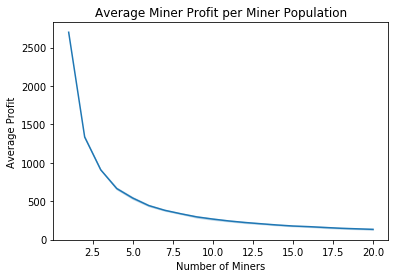

In [64]:
plt.figure()
df = pd.DataFrame(columns=["Num Miners", "Ave Profit"])
for i in range(1, 21):
    a = ave_miner_profit[i-1]
    for j in range(a.shape[0]):
        tmp = pd.DataFrame({'Num Miners': [i], "Ave Profit": [a[j]]})
        df = pd.concat([df, tmp])
sns.lineplot(x="Num Miners", y="Ave Profit", data=df, ci="sd")
plt.title("Average Miner Profit per Miner Population")
plt.xlabel("Number of Miners")
plt.ylabel("Average Profit")
plt.savefig("MinorProfit.png")

In [55]:
df

,Num Miners,Ave Profit


In [24]:
barbazz.shape

(5989, 3)

In [23]:
barbazz = barbazz.sample(frac=.01)

In [25]:
mod = gp.GaussianProcessRegressor().fit(barbazz["delay(hours)"][:, np.newaxis], barbazz["fee amount"])

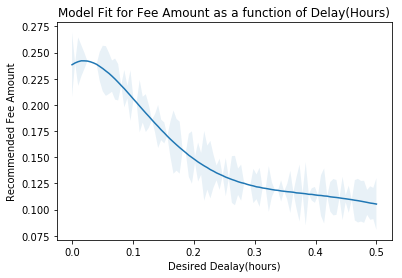

In [31]:
X = np.linspace(0, 0.5, 100)
ymean, ystd = mod.predict(X[:, np.newaxis], return_std=True)
plt.figure()
plt.plot(X, ymean)
plt.fill_between(X, ymean - ystd, ymean + ystd, alpha=0.1)
plt.title("Model Fit for Fee Amount as a function of Delay(Hours)")
plt.ylabel("Recommended Fee Amount")
plt.xlabel("Desired Dealay(hours)")
plt.savefig("TwoRateModel.png")

In [43]:
mod.predict([[.1], [.2], [.3], [.4], [.5]])

array([0.20624542, 0.14850616, 0.12242126, 0.11394882, 0.10525894])

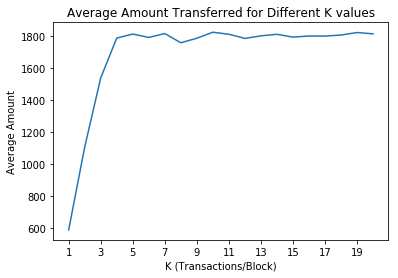

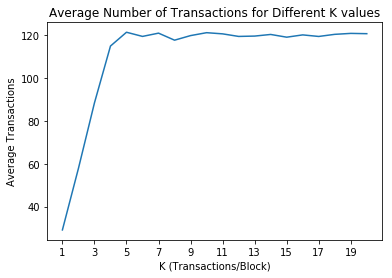

In [116]:
plt.plot(np.arange(1,21), average_amt1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Amount")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Amount Transferred for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_num1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Transactions")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Number of Transactions for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_fee1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Fees")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Fees for Different K values")
plt.show()

plt.plot(np.arange(1,21), average_delay1)
plt.xticks(np.arange(1, 21, 2))
plt.ylabel("Average Delay")
plt.xlabel("K (Transactions/Block)")
plt.title("Average Delay for Different K values")
plt.show()

In [57]:
print(np.array(ave)[-1])
print(np.array(avenum)[-1])

[2442.12633637 2179.73026367 1700.99875621 ... 1772.48514252 1772.46649384
 1772.42043311]
[143.65449037 137.18582079 105.37160437 ... 118.16800986 118.16609975
 118.16302899]


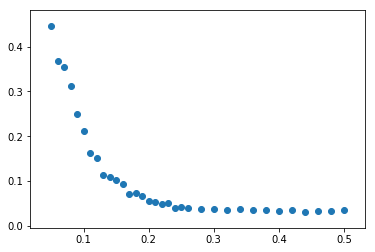

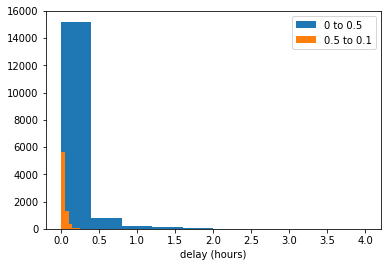

0.13601695841224187 0.03503714859398411 0.292764386537681 0.0385033496198127


In [36]:
new = saved.groupby(['fee amount']).mean().reset_index()
plt.scatter(new['fee amount'], new['delay(hours)'])
plt.show()

from scipy.stats import norm

amounttt = np.array(amountt)
delayy = np.array(duration)
where = np.where(np.logical_and(amounttt >= 0, amounttt <= 0.25))
plt.hist(delayy[where],label = "0 to 0.5")
plt.xlabel("delay (hours)")
mu1, std1 = norm.fit(delayy[where])

where = np.where(np.logical_and(amounttt > 0.25, amounttt <= 0.5))
plt.hist(delayy[where],label = "0.5 to 0.1")
mu3, std3 = norm.fit(delayy[where])

plt.legend()
plt.show()
print(mu1,mu3,std1, std3)


In [42]:
mod = gp.GaussianProcessRegressor().fit(new["delay(hours)"][:, np.newaxis], new["fee amount"])

In [52]:
mod.predict([[.001], [.5]])

array([0.72560304, 0.07124698])